import pandas as py
import numpy as n
import seaborn as sns
import nltk
import matplotlib.pyplot as plt
import os
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
%matplotlib inline

In [32]:
df=py.read_csv('tinder_google_play_reviews.csv')

In [33]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,2841f06a-097c-402e-9582-c6017bdf0263,missy stan,https://play-lh.googleusercontent.com/a/AATXAJ...,Tries to make you pay after you've already bee...,1,0,NaN,2022-06-18 04:14:04,NaN,NaN
1,bb168e44-d3e8-4877-bfe2-ad464d4c3047,Misty Vieyra,https://play-lh.googleusercontent.com/a-/AOh14...,Not a very positive experience...,2,0,13.10.1,2022-06-18 04:12:04,NaN,NaN
2,fbfb7f19-6011-422b-a380-a3e528825069,Thobie Shaun Mabuye,https://play-lh.googleusercontent.com/a/AATXAJ...,It's my first time on Tinder but everyhing is ...,5,0,13.8.0,2022-06-18 04:08:44,NaN,NaN
3,739be27e-5dbd-4874-a143-22fdc77b25a8,Divya Ladia,https://play-lh.googleusercontent.com/a/AATXAJ...,Every thing is good about this app but the iss...,3,0,13.10.1,2022-06-18 03:55:42,NaN,NaN
4,ee3fd7c2-bc92-48d3-95dd-2f75eeafe843,Ryan Stanz,https://play-lh.googleusercontent.com/a-/AOh14...,Not even free,1,0,13.10.1,2022-06-18 03:42:59,NaN,NaN


In [34]:
df.content.head()

0    Tries to make you pay after you've already bee...
1                    Not a very positive experience...
2    It's my first time on Tinder but everyhing is ...
3    Every thing is good about this app but the iss...
4                                        Not even free
Name: content, dtype: object

In [35]:
! pip install Textblob

In [49]:
#remove lower casing and puntucations

df['content'] = df['content'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))

In [50]:
#remove puntuations
df['content']=df['content'].str.replace('[^\w\s]',"")
df.content.head(5)

C:\Users\heyro\AppData\Local\Temp\ipykernel_6668\1333093300.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['content']=df['content'].str.replace('[^\w\s]',"")


0    tries to make you pay after youve already been...
1                       not a very positive experience
2    its my first time on tinder but everyhing is j...
3    every thing is good about this app but the iss...
4                                        not even free
Name: content, dtype: object

In [52]:
#removal of stop words

stop=stopwords.words('English')
df['content'] = df['content'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop))


In [53]:
#spelling correction
df['content']=df['content'].apply(lambda x: " ".join([Word(word).
lemmatize() for word in x.split()]))
df.content.head(10)

0              try make pay youve already app free app
1                                  positive experience
2    first time tinder everyhing simple took 2minut...
3    every thing good app issue facing able subscri...
4                                            even free
5                                           waste time
6    account got hacked banned ive contacted custom...
7                                              bakawas
8    factory reset phone went log back banned ridic...
9    make app completely freel like alot make ameri...
Name: content, dtype: object

In [54]:
#WORD CLOUD


In [55]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

<AxesSubplot:xlabel='score', ylabel='count'>

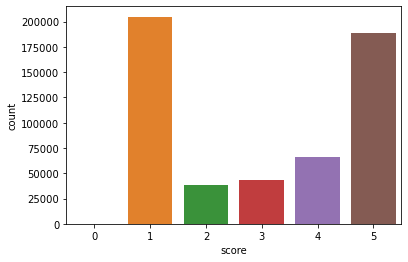

In [56]:
sns.countplot(data=df,x='score')

In [57]:
texts=df
#drop null values
texts.dropna(inplace=True)

In [58]:
rating_1=texts[texts['score']==1]
rating_2=texts[texts['score']==2]
rating_3=texts[texts['score']==3]
rating_4=texts[texts['score']==4]
rating_5=texts[texts['score']==5]

In [59]:
texts_sample=py.concat([rating_1,rating_2,rating_3,rating_4,rating_5],axis=0)
texts_sample.reset_index(drop=True,inplace=True)

In [61]:
#splitting the score into negative (1,2) and positive (4,5)

#negative reviews
negative_reviews= texts_sample[texts_sample['score'].isin([1,2])]
positive_reviews= texts_sample[texts_sample['score'].isin([4,5])]

#converting them to strings
negative_reviews_str= negative_reviews.content.str.cat()
positive_reviews_str= positive_reviews.content.str.cat()

Text(0.5, 1.0, 'Negative Reviews')

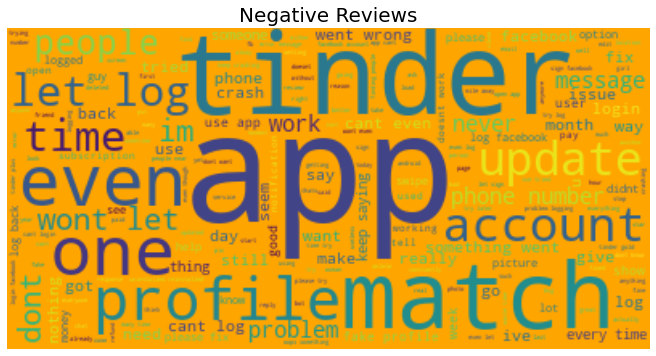

In [62]:
#creating negative and positive word clouds

wordcloud_negative=WordCloud(background_color='orange').generate(negative_reviews_str)
wordcloud_positive=WordCloud(background_color='white').generate(positive_reviews_str)


#plot negative

figure=plt.figure(figsize=(13,13))
axl=figure.add_subplot(211)
axl.imshow(wordcloud_negative,interpolation='bilinear')
axl.axis("off")
axl.set_title('Negative Reviews',fontsize=20)
                  

Text(0.5, 1.0, 'Positive Reviews')

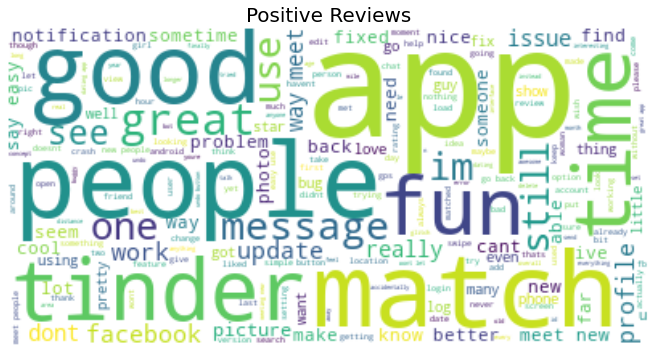

In [63]:
#plot positive

figure=plt.figure(figsize=(13,13))
axl=figure.add_subplot(211)
axl.imshow(wordcloud_positive,interpolation='bilinear')
axl.axis("off")
axl.set_title('Positive Reviews',fontsize=20)
                  

In [64]:
#SENTIMENT SCORE
!pip install vaderSentiment

In [65]:
cp=sns.color_palette()
import nltk 
import nltk.data
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

A=SentimentIntensityAnalyzer()

In [66]:
#generating sentiment to the whole file

emptyline=[]
for row in df['content']:
    r=A.polarity_scores(row)
    emptyline.append(r)
    
#new dataframe with sentiment

newdf=py.DataFrame(emptyline)
newdf.head()

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.347,0.462,0.192,-0.6551
2,0.096,0.701,0.203,0.7618
3,0.000,1.000,0.000,0.0000
4,0.000,1.000,0.000,0.0000


In [67]:
#adding this newdf to the actual dataset

df_c=py.concat([df.reset_index(drop=True),newdf],axis=1)
df_c.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,neg,neu,pos,compound
0,6daa24c0-0a1a-415d-81ab-5faab9f1573a,a b,https://play-lh.googleusercontent.com/a-/AOh14...,hmm let see,4,0,11.1.0,2022-06-17 20:03:55,"Hi Abhir, make sure that your phone’s operatin...",2018-02-25 21:46:25,0.000,1.000,0.000,0.0000
1,0dae0c24-bda0-42db-9e9f-b01e78164505,Andrew Z,https://play-lh.googleusercontent.com/a/AATXAJ...,still randomly banned forced enter phone numbe...,1,65,13.10.1,2022-06-16 13:41:27,"Hello, please email help@gotinder.com. Thank you.",2018-10-17 14:35:38,0.347,0.462,0.192,-0.6551
2,03ac2f6d-255e-4ebd-8aba-815faa68f3cc,Bekzod Fakhriddinov,https://play-lh.googleusercontent.com/a/AATXAJ...,useless 3 year nothing met 3 girl bar city boa...,1,1,10.23.2,2022-06-14 19:18:36,Hi - Please note that Tinder Plus and Tinder G...,2019-10-14 22:38:38,0.096,0.701,0.203,0.7618
3,4e2b4cca-8e9e-4dcb-92e1-1a08d208dc2b,W B,https://play-lh.googleusercontent.com/a/AATXAJ...,continuously log dont open app everyday meanin...,2,0,13.8.0,2022-06-13 01:26:12,"Hi William, this might be temporary so please ...",2017-02-14 07:07:17,0.000,1.000,0.000,0.0000
4,84b6ddea-da14-40cd-a5f3-aee6a518a9db,Marco De Souza,https://play-lh.googleusercontent.com/a-/AOh14...,need,4,1,13.10.0,2022-06-11 14:48:19,"Hi Marco, this might be temporary so please tr...",2016-08-30 07:42:51,0.000,1.000,0.000,0.0000


In [68]:
df_c['Sentiment']=n.where(df_c['compound']>=0,'Positive','Negative')
df_c.head(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,neg,neu,pos,compound,Sentiment
0,6daa24c0-0a1a-415d-81ab-5faab9f1573a,a b,https://play-lh.googleusercontent.com/a-/AOh14...,hmm let see,4,0,11.1.0,2022-06-17 20:03:55,"Hi Abhir, make sure that your phone’s operatin...",2018-02-25 21:46:25,0.000,1.000,0.000,0.0000,Positive
1,0dae0c24-bda0-42db-9e9f-b01e78164505,Andrew Z,https://play-lh.googleusercontent.com/a/AATXAJ...,still randomly banned forced enter phone numbe...,1,65,13.10.1,2022-06-16 13:41:27,"Hello, please email help@gotinder.com. Thank you.",2018-10-17 14:35:38,0.347,0.462,0.192,-0.6551,Negative
2,03ac2f6d-255e-4ebd-8aba-815faa68f3cc,Bekzod Fakhriddinov,https://play-lh.googleusercontent.com/a/AATXAJ...,useless 3 year nothing met 3 girl bar city boa...,1,1,10.23.2,2022-06-14 19:18:36,Hi - Please note that Tinder Plus and Tinder G...,2019-10-14 22:38:38,0.096,0.701,0.203,0.7618,Positive
3,4e2b4cca-8e9e-4dcb-92e1-1a08d208dc2b,W B,https://play-lh.googleusercontent.com/a/AATXAJ...,continuously log dont open app everyday meanin...,2,0,13.8.0,2022-06-13 01:26:12,"Hi William, this might be temporary so please ...",2017-02-14 07:07:17,0.000,1.000,0.000,0.0000,Positive
4,84b6ddea-da14-40cd-a5f3-aee6a518a9db,Marco De Souza,https://play-lh.googleusercontent.com/a-/AOh14...,need,4,1,13.10.0,2022-06-11 14:48:19,"Hi Marco, this might be temporary so please tr...",2016-08-30 07:42:51,0.000,1.000,0.000,0.0000,Positive
5,5cb3bb8b-3cb5-4c24-b49c-2f3126ae34f1,Shannon McWatters,https://play-lh.googleusercontent.com/a-/AOh14...,viral crash note 9 got new phone s21 ultra sti...,1,0,11.2.1,2022-06-10 05:34:18,We’re sorry to hear about this and understand ...,2019-03-29 00:28:09,0.158,0.702,0.141,-0.0757,Negative
6,5529ed6d-1467-43c9-a656-b2368725881f,Scott B,https://play-lh.googleusercontent.com/a/AATXAJ...,tinder lost control app many fake profile get ...,1,1,13.8.0,2022-06-08 13:34:33,"Hi Scott, this might be temporary so please tr...",2017-03-30 07:45:13,0.338,0.556,0.106,-0.9349,Negative
7,6caa9683-e0c9-423d-b59b-a25a336819f1,Thomas Skelhorn,https://play-lh.googleusercontent.com/a-/AOh14...,paying gold month resetting match time try get...,1,0,13.8.0,2022-06-07 23:26:13,"Hi Thomas, this might be temporary so please t...",2016-11-23 08:57:15,0.174,0.705,0.120,-0.3818,Negative
8,e3da264b-dc00-414a-a971-5cbb18b6086f,DanTheMan,https://play-lh.googleusercontent.com/a-/AOh14...,live southwest sweden get connected danish peo...,1,2,13.8.0,2022-06-07 18:57:10,Thanks for sharing your feedback. We want you ...,2019-07-22 20:11:08,0.000,0.833,0.167,0.4939,Positive
9,2eef78a7-4461-412b-bc78-5dbc708c7a26,Justin B,https://play-lh.googleusercontent.com/a/AATXAJ...,latest update force turn wifi scanning drain b...,1,2,13.8.0,2022-06-07 05:58:25,Hi there! Try updating your photos or turn on ...,2019-04-25 15:20:04,0.287,0.519,0.194,-0.5921,Negative


<AxesSubplot:>

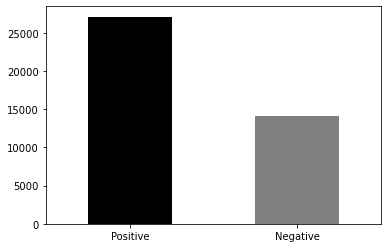

In [74]:
#final result

result=df_c['Sentiment'].value_counts()
result.plot(kind='bar',rot=0,color=['black','gray'])